The predicted price for a house of size 1600 sq ft is $276.17 thousands.


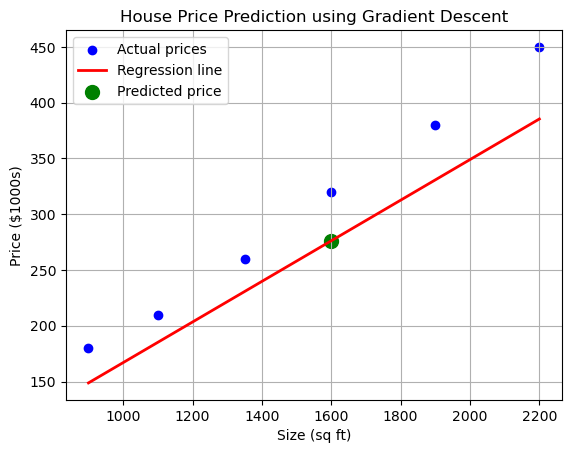

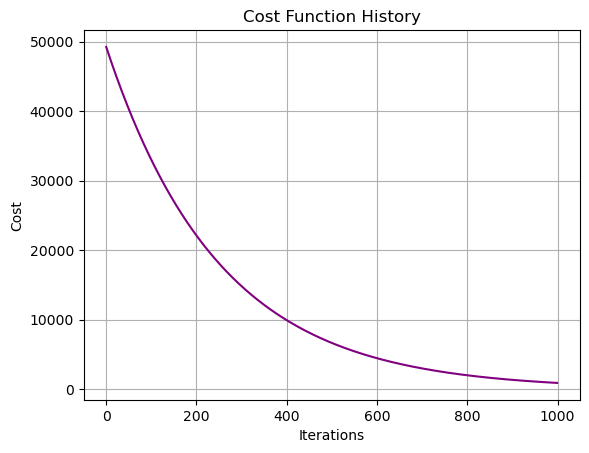

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# New dataset: sizes in square feet and corresponding prices in thousands of dollars
house_sizes = np.array([900, 1100, 1350, 1600, 1900, 2200])  
house_prices = np.array([180, 210, 260, 320, 380, 450])  

# Data normalization
normalized_sizes = (house_sizes - np.mean(house_sizes)) / np.std(house_sizes)

# Cost function calculation
def calculate_cost(X, y, weights):
    num_samples = len(y)
    predictions = X.dot(weights)
    errors = predictions - y
    cost = (1 / (2 * num_samples)) * np.sum(errors ** 2)
    return cost

# Linear regression using gradient descent
def perform_gradient_descent(X, y, learning_rate=0.001, iterations=1000):
    num_samples = len(y)
    X_with_bias = np.c_[np.ones((num_samples, 1)), X]
    weights = np.zeros(2)
    
    cost_history = []

    for _ in range(iterations):
        predictions = X_with_bias.dot(weights)
        errors = predictions - y
        gradients = (2 / num_samples) * X_with_bias.T.dot(errors)
        weights -= learning_rate * gradients
        cost = calculate_cost(X_with_bias, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# Execute gradient descent to find optimal weights
weights, cost_history = perform_gradient_descent(normalized_sizes, house_prices, learning_rate=0.001, iterations=1000)

# Price prediction function
def predict_house_price(size):
    normalized_size = (size - np.mean(house_sizes)) / np.std(house_sizes)
    return weights[0] + weights[1] * normalized_size

# Example prediction for a specific house size
example_size = 1600
predicted_price = predict_house_price(example_size)
print(f"The predicted price for a house of size {example_size} sq ft is ${predicted_price:.2f} thousands.")

# Visualization of regression line and actual data points
plt.scatter(house_sizes, house_prices, color='blue', label='Actual prices')
plt.plot(house_sizes, predict_house_price(house_sizes), color='red', linewidth=2, label='Regression line')
plt.scatter(example_size, predicted_price, color='green', label='Predicted price', s=100)
plt.title('House Price Prediction using Gradient Descent')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($1000s)')
plt.legend()
plt.grid()
plt.show()

# Visualization of cost history
plt.plot(cost_history, color='purple')
plt.title('Cost Function History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid()
plt.show()
